<a href="https://colab.research.google.com/github/shalaby02/DM-Classification/blob/main/Classification_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Yahia Shalaby

ID: 52-0556

Tutorial: T-02

---

Name: Zeina Riad

ID: 52-1245

Tutorial: T-02

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

<ipython-input-3-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
# Here we are viewing the avaialble information on the dataset such as data type, null counts and the provided columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
# Here we explore the statistical measures of the numeric variables of the dataset
df.describe()

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [ ]:
# Here we check all the null values we have for each column
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
# This is a function where we view all the distinct values of each column
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
# This is a function where we view the number of distinct values for each column
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")


customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
# View all categorical values
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


In [ ]:
# view some of the rows that contain null values
null_rows = df[df.isnull().any(axis=1)]
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),$106.7/m,NaN,No
19,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,$90.05/m,NaN,No
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),$59.9/m,NaN,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),$95.5/m,NaN,No
37,6572-ADKRS,Female,0,No,No,46,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),$74.8/m,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),$20.65/m,NaN,No
7007,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$70.65/m,NaN,Yes
7014,NaN,Female,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),$95.05/m,NaN,No
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$102.95/m,NaN,Yes


In [ ]:
# Capitalizing col. names
def capitalize_first_letter(s):
    return s[0].capitalize() + s[1:]

# Capitalize only the first letter of each column name
df.columns = [capitalize_first_letter(col) for col in df.columns]
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


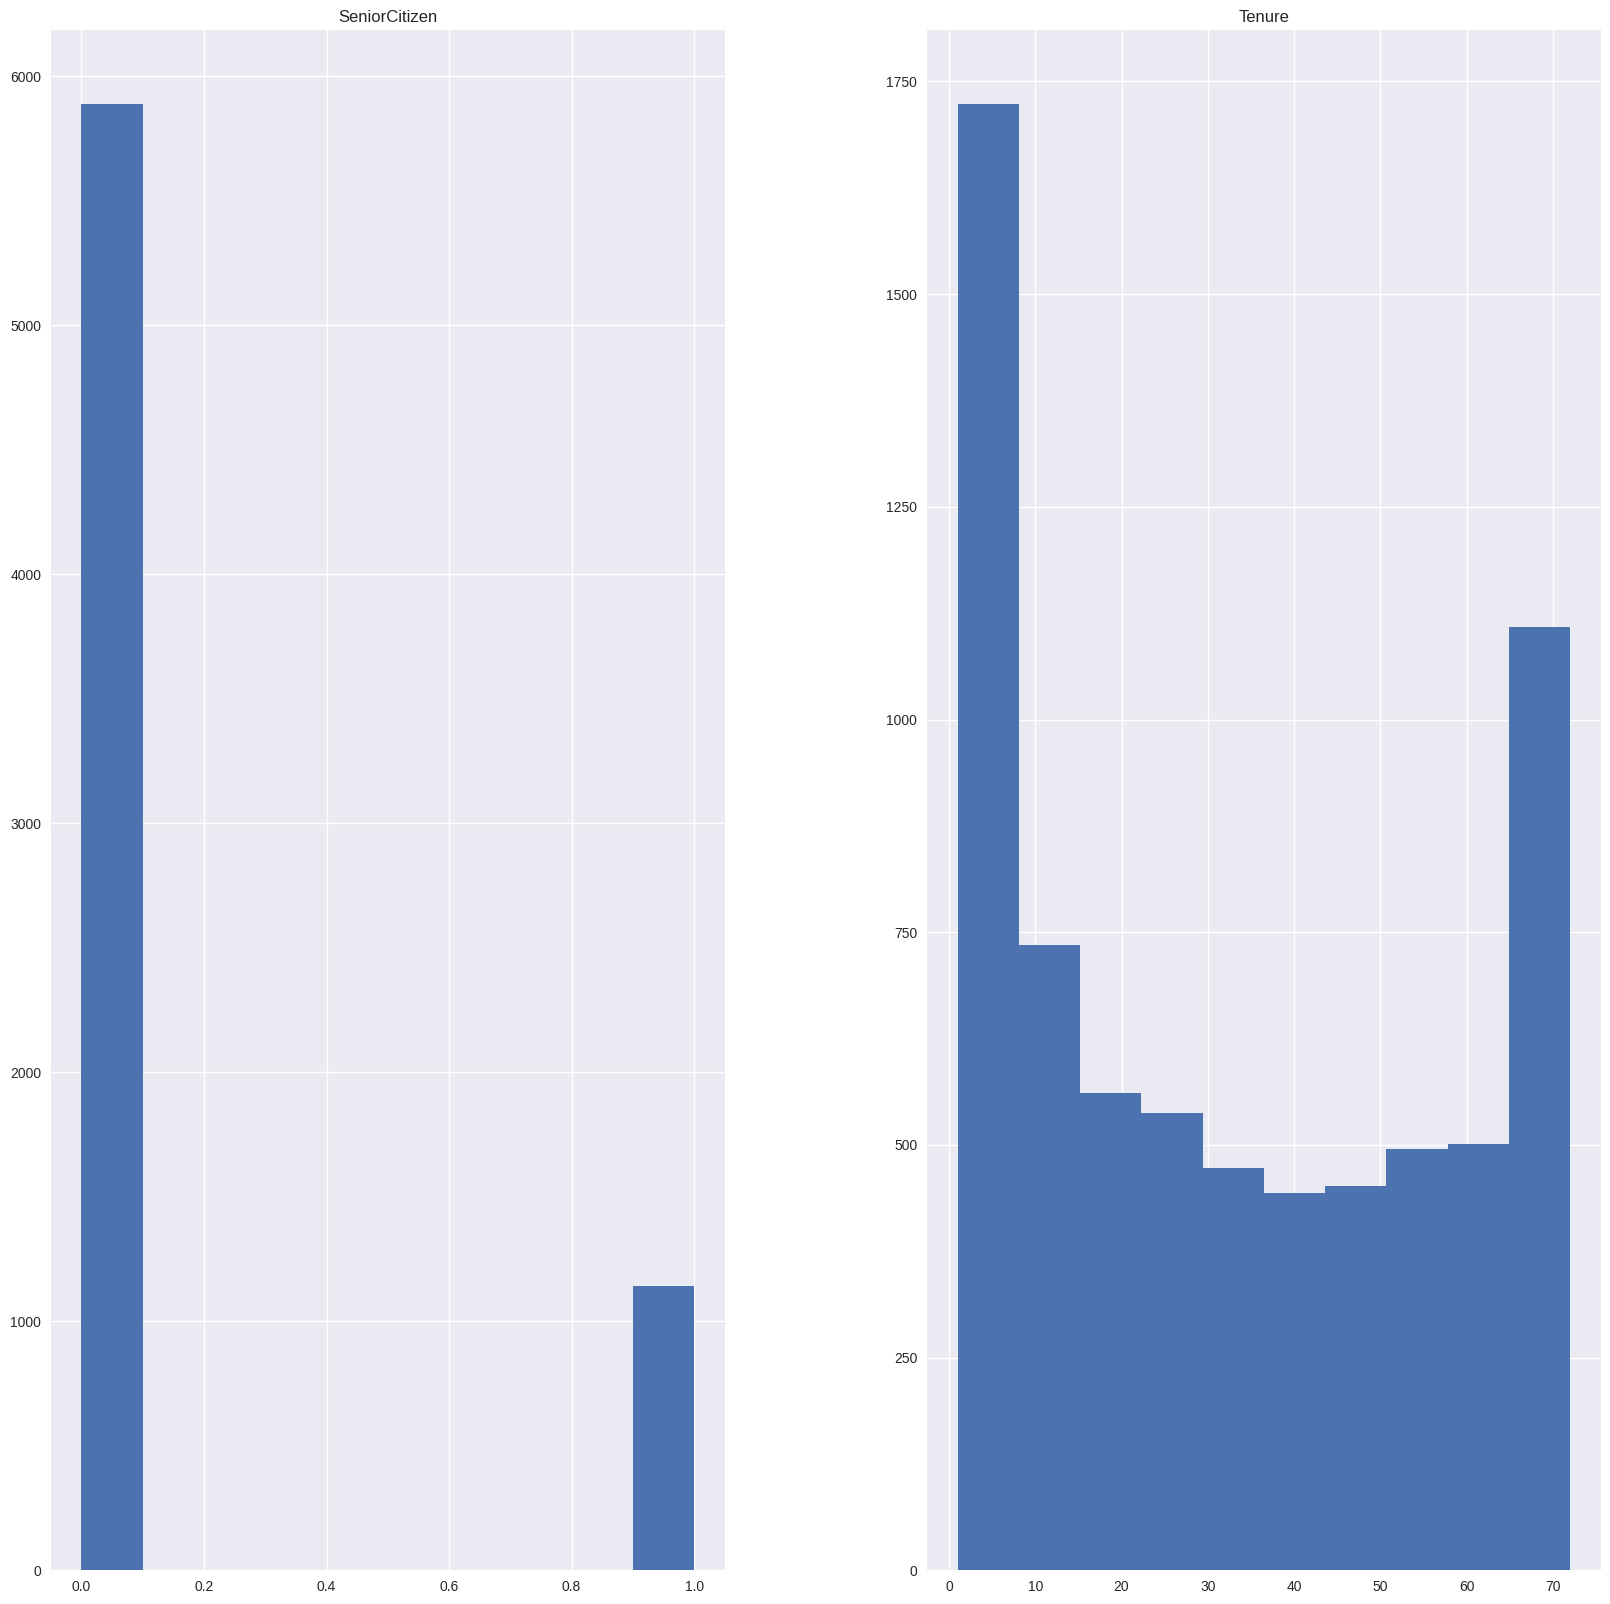

In [ ]:
# Explore numeric columns by displaying histograms
df.hist(figsize=(20, 20));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        6976 non-null   object
 1   Gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   Tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
# Explore other columns by displaying barplot
categorical_features = df.drop(["Tenure","MonthlyCharges","TotalCharges",'Churn',"CustomerID"], axis=1)

# Plotting every feature average in relation to the "target"
# sns.set(font_scale=1.2)
# plt.figure(figsize=(35, 30))

# for i, column in enumerate(categorical_features, 1):
#     plt.subplot(5, 4, i)
#     g = sns.countplot(x=column, hue='Churn', data=df, palette='viridis')
#     g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     plt.ylabel('Churn Count')
#     plt.xlabel(f'{column}')

# plt.tight_layout()
# plt.show()


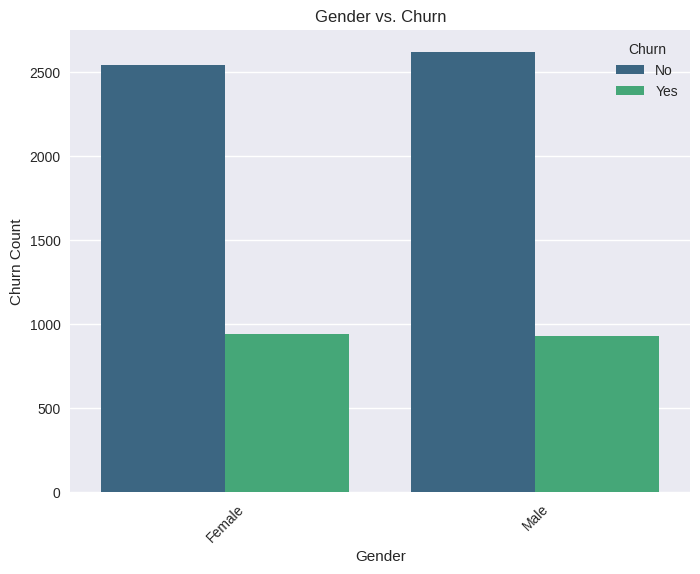

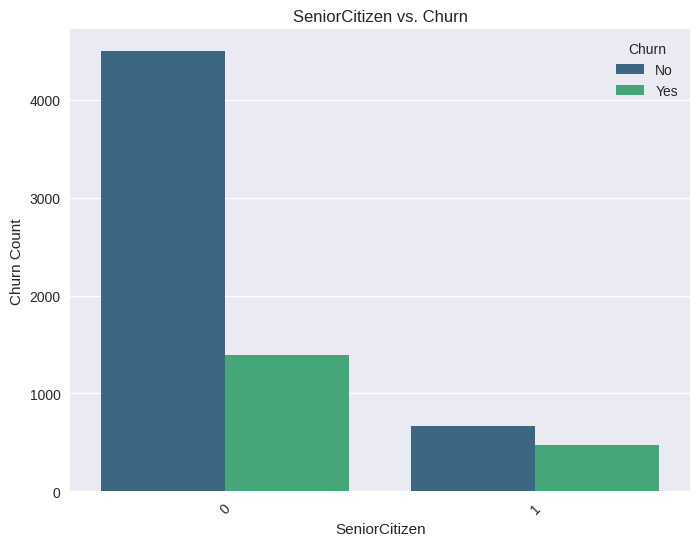

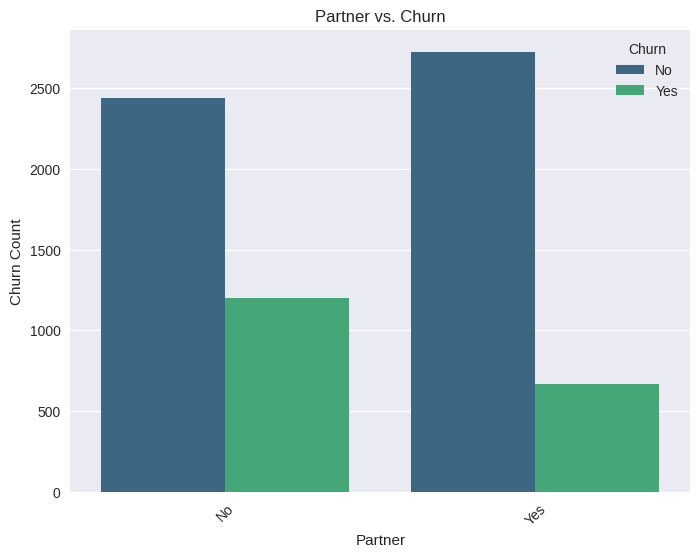

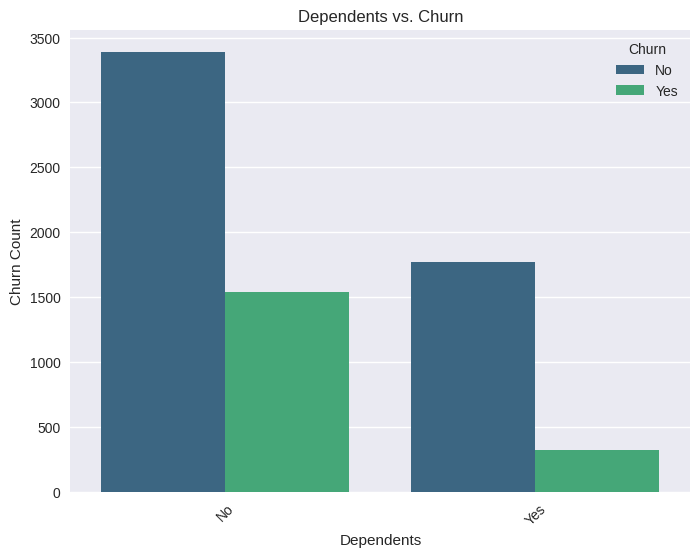

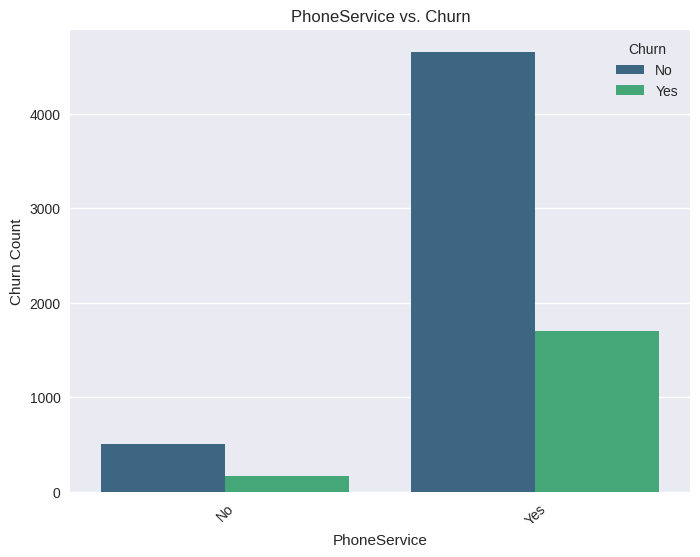

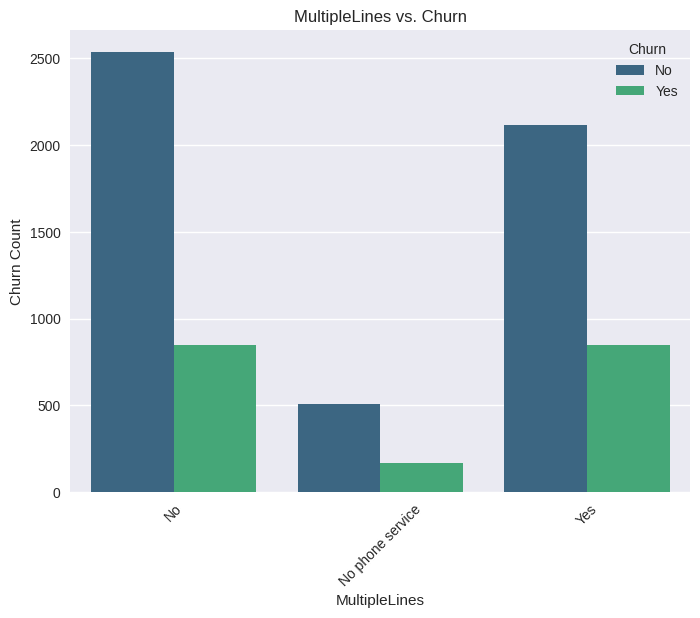

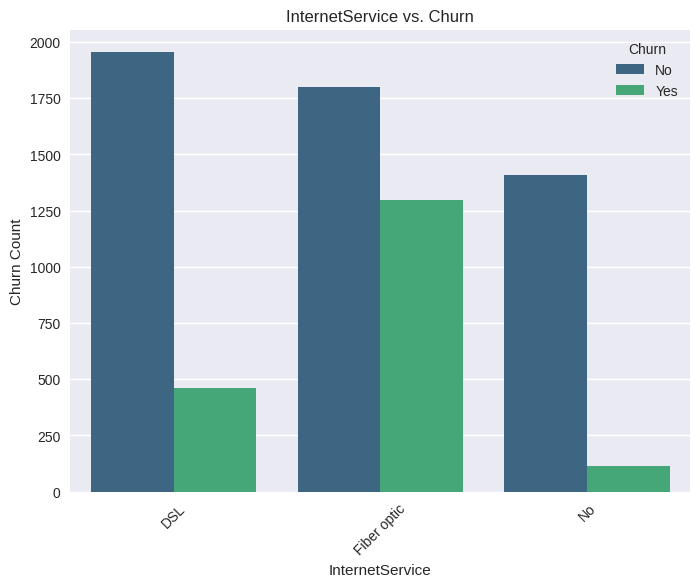

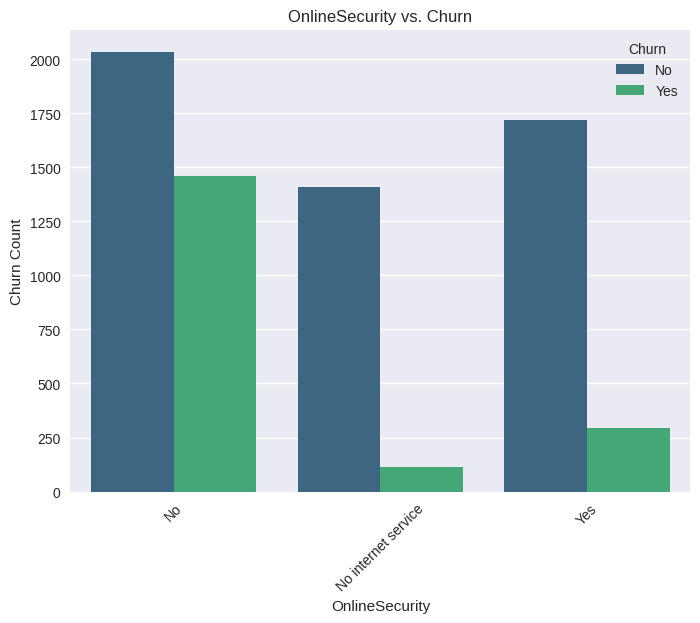

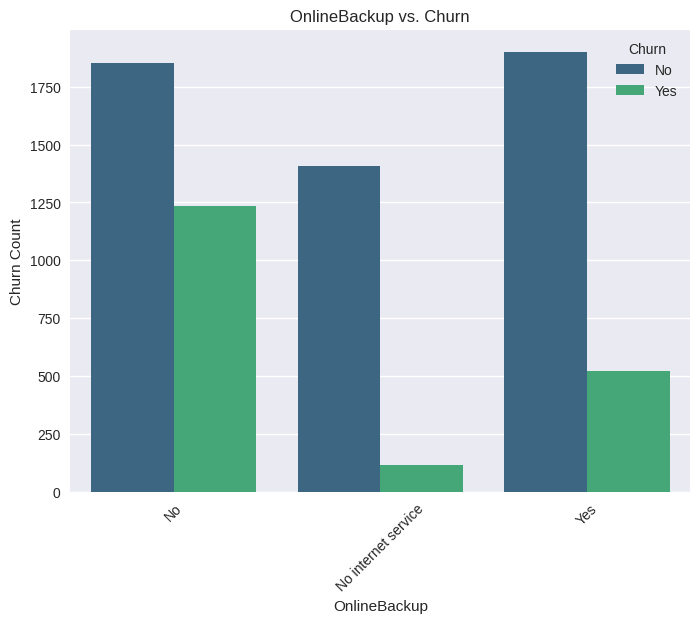

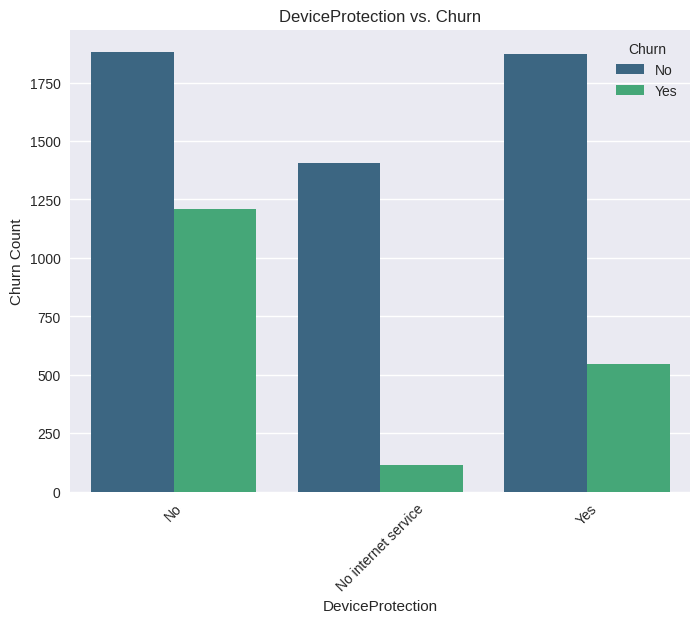

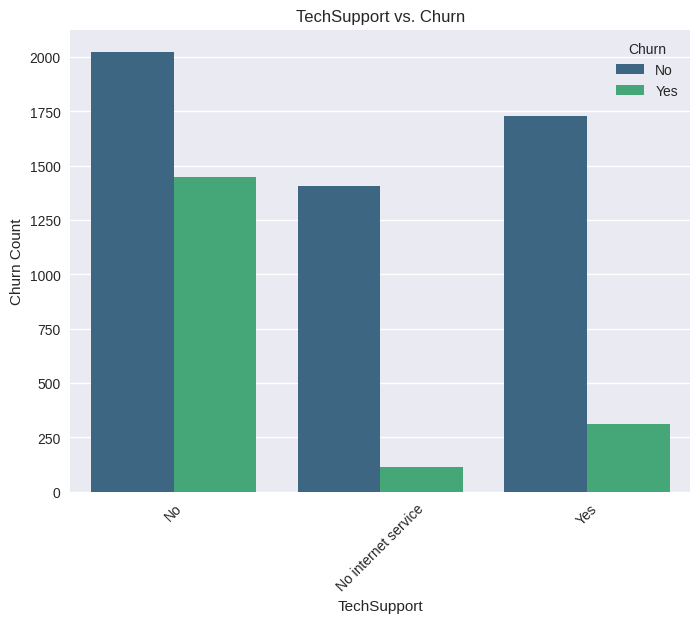

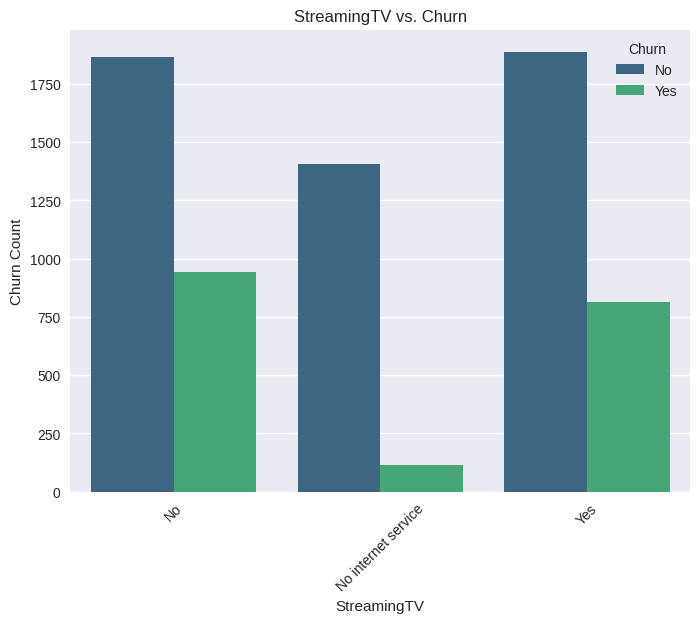

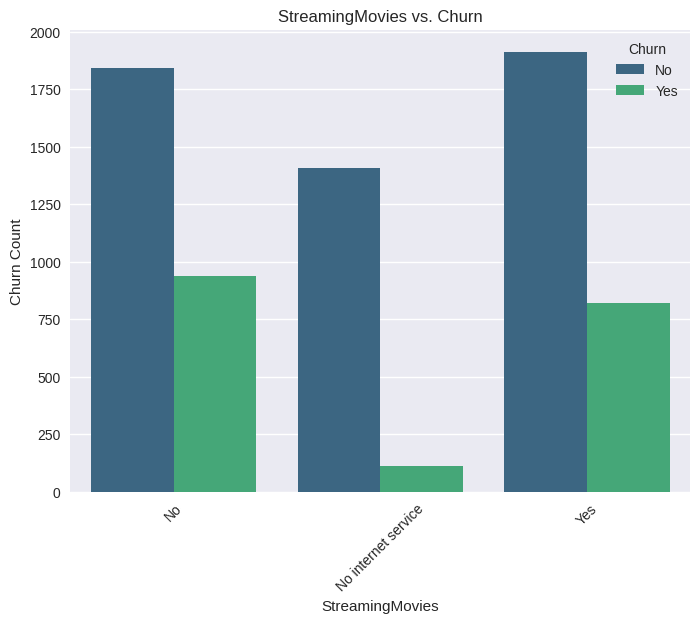

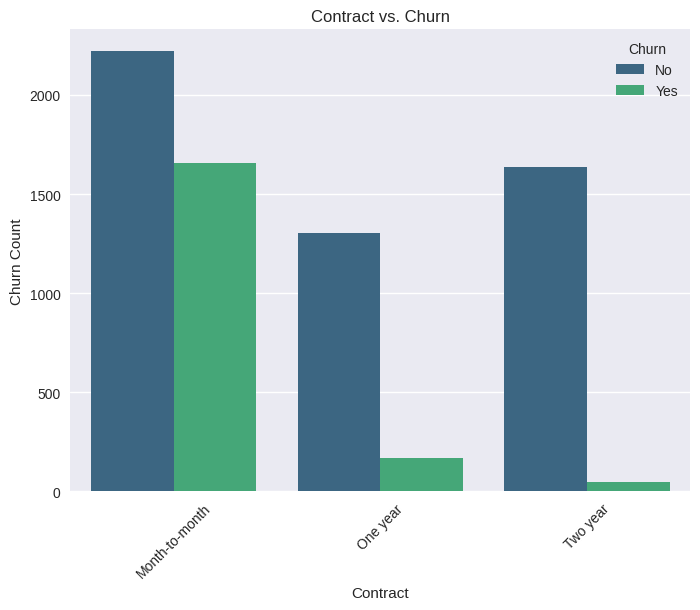

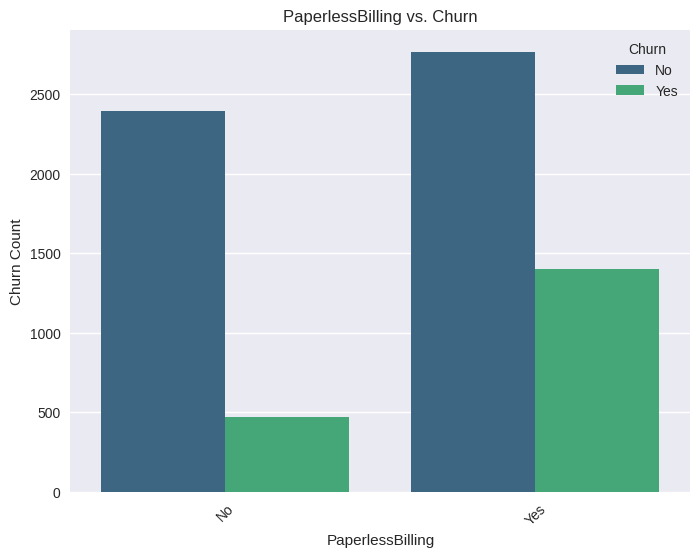

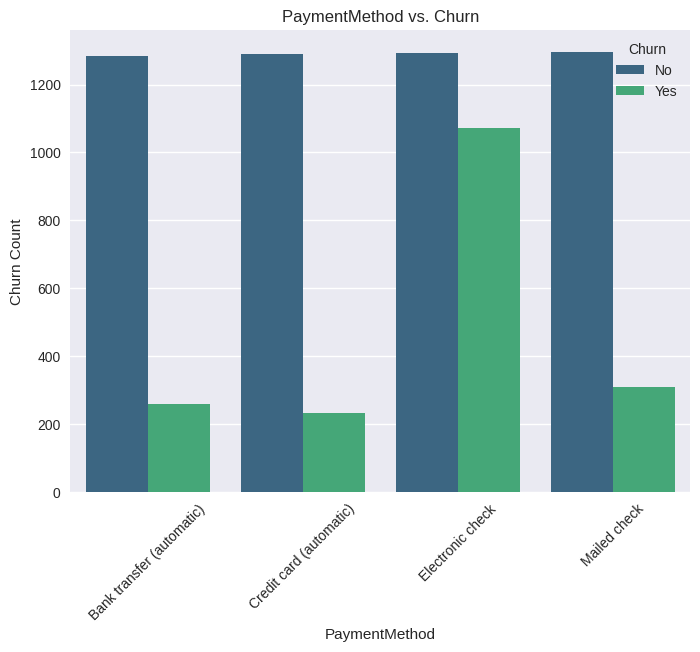

In [ ]:
temp = df.drop(["CustomerID"],axis=1)
for column in categorical_features:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=column, y='count', hue="Churn", data=temp.groupby([column, "Churn"]).size().reset_index(name='count'), palette='viridis')
        plt.title(f'{column} vs. {"Churn"}')
        plt.xlabel(column)
        plt.ylabel('Churn Count')
        plt.xticks(rotation=45)
        plt.legend(title="Churn")
        plt.show()

## Data Cleaning

In [ ]:
# Capitalizing col. names
def capitalize_first_letter(s):
    return s[0].capitalize() + s[1:]

# Capitalize only the first letter of each column name
df.columns = [capitalize_first_letter(col) for col in df.columns]
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


In [ ]:
# Cleaining the following columns by removing unnecessary $ and /m signs anf changing data types to float
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '')
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '').astype(float)

<ipython-input-19-69f32481036f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').astype(float)
<ipython-input-19-69f32481036f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '')


In [ ]:
# Replacing null total charges by multiplying tenure and monthlycharges. (NB: Tenure is a redundant variable that should be removed as it can be derived from other variables)
def fill_missing_total_charges(df):
    for index, row in df.iterrows():
        if pd.isnull(row['TotalCharges']):
            # If 'TotalCharges' is NaN, replace it with 'tenure' * 'MonthlyCharges'
            df.at[index, 'TotalCharges'] = row['Tenure'] * row['MonthlyCharges']

# Call the method to fill missing values
fill_missing_total_charges(df)

df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Removing CustomerID
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

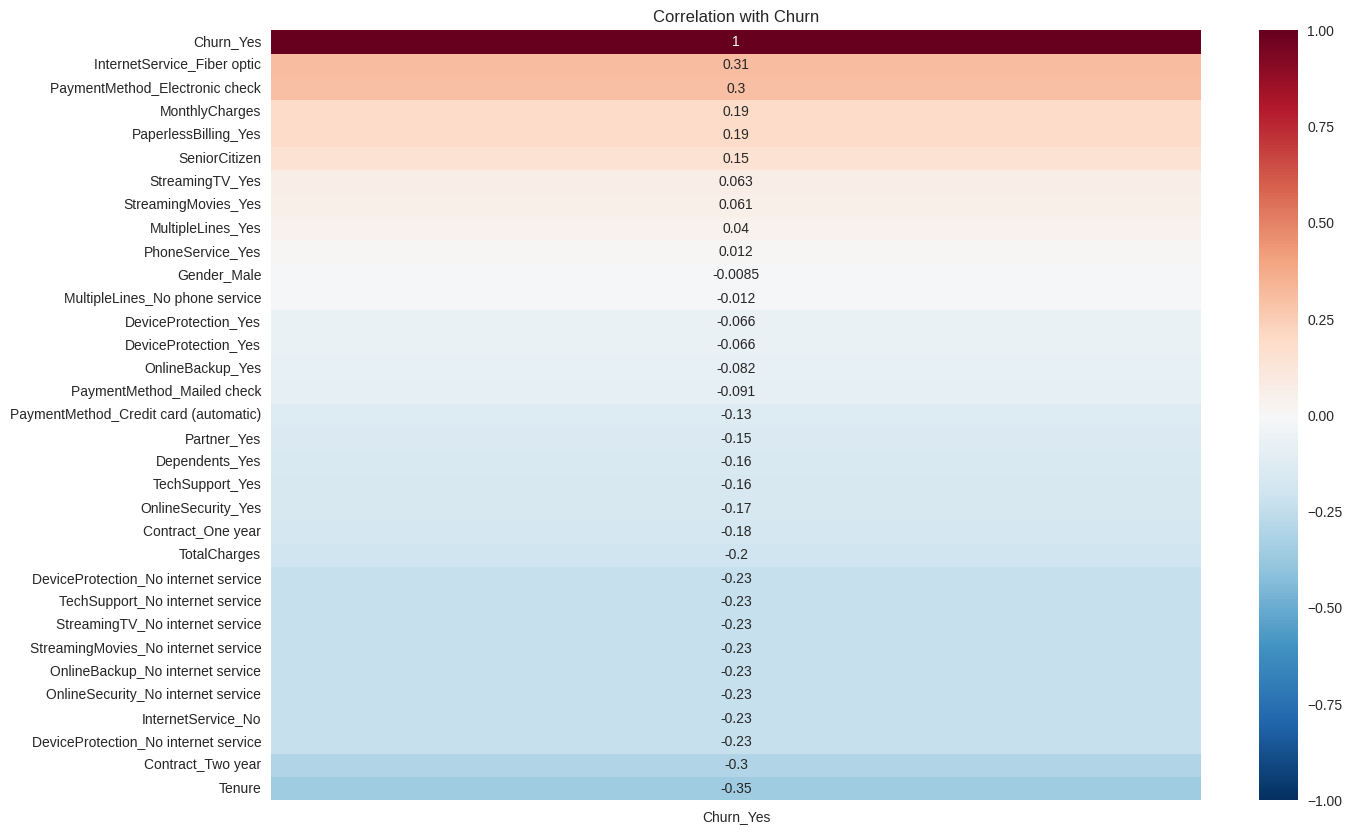

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Partner', 'Dependents', 'PhoneService', "MultipleLines","InternetService",
                                         "OnlineSecurity","OnlineBackup","DeviceProtection","DeviceProtection","TechSupport",
                                         "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod",'Churn'], drop_first=True)
corr_churn = df_encoded.corr()['Churn_Yes'].sort_values(ascending=False)

# Create a heatmap for correlation with Churn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_churn.to_frame(), cmap='RdBu_r', annot=True, cbar=True, vmin=-1, vmax=1)
plt.title("Correlation with Churn")
plt.show()

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

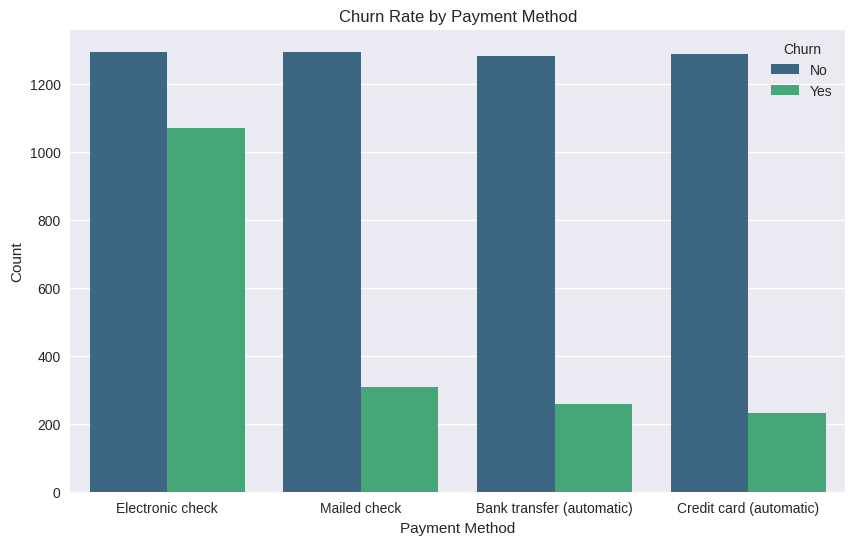

In [ ]:
df_paymentMethod = pd.DataFrame(df[["PaymentMethod","Churn"]])

# Create a count plot to visualize churn rates by payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_paymentMethod, palette='viridis')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

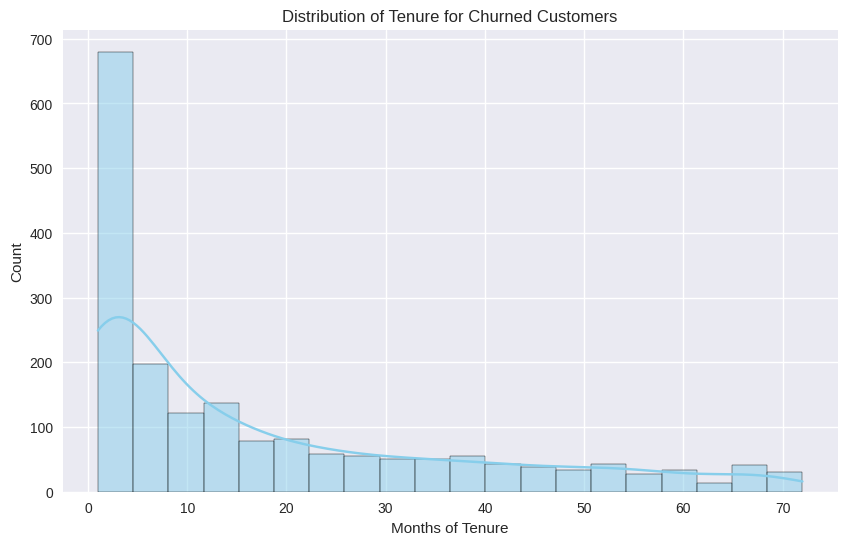

In [ ]:
df_churned = df[df['Churn'] == 'Yes']

# Create a histogram of tenure for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(df_churned['Tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Months of Tenure')
plt.ylabel('Count')
plt.show()


**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [ ]:
# Applying cat coed to the Churn variable
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [ ]:
# Setting up a categorical_features variable to store all the categorical variables for our model
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

In [ ]:
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
# Re-adjusting capital letters
def capitalize_first_letter(s):
    return s[0].capitalize() + s[1:]

# Capitalize only the first letter of each column name
categorical_features = [capitalize_first_letter(col) for col in df.columns]

Removing non-categorical values from the category_features variable:

In [ ]:
categorical_features.remove('TotalCharges')
categorical_features.remove('MonthlyCharges')

In [ ]:
categorical_features.remove('Tenure')

In [ ]:
categorical_features.remove('Churn')

Removing low churn correlated variables from our dataset:

In [ ]:
df=df.drop(["Gender","PhoneService","MultipleLines","OnlineBackup","DeviceProtection","StreamingTV","StreamingMovies"],axis=1)

In [ ]:
categorical_features.remove('Gender')

In [ ]:
categorical_features.remove('PhoneService')

In [ ]:
categorical_features.remove('MultipleLines')

In [ ]:
categorical_features.remove('OnlineBackup')

In [ ]:
categorical_features.remove('DeviceProtection')

In [ ]:
categorical_features.remove('StreamingTV')

In [ ]:
categorical_features.remove('StreamingMovies')

In [ ]:
categorical_features

['SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
df_encoded = df.copy()

In [ ]:
df_encoded

,SeniorCitizen,Partner,Dependents,Tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,DSL,Yes,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,DSL,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Yes,Yes,24,DSL,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,0,Yes,Yes,72,Fiber optic,No,No,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,0,Yes,Yes,11,DSL,Yes,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,1,Yes,No,4,Fiber optic,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
# df_encoded = pd.DataFrame(df.drop(['Tenure',"MonthlyCharges","TotalCharges"],axis=1))

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int8   
 4   SeniorCitizen_0                          7032 non-null   uint8  
 5   SeniorCitizen_1                          7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  InternetService_DSL                      7032 no

In [ ]:
df_encoded.columns

Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df_encoded.drop(['SeniorCitizen_0',"Partner_No","Dependents_No"], axis='columns', inplace=True)
df_encoded.columns

Index(['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_1',
       'Partner_Yes', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
# model_df = pd.DataFrame(df.drop(['Gender',"PhoneService","MultipleLines","StreamingMovies","StreamingTV","DeviceProtection","OnlineBackup"],axis=1))

In [ ]:
# model_df.info()

In [ ]:
# model_df['SeniorCitizen'] = model_df['SeniorCitizen'].astype(object)
# model_df['Churn'] = model_df['Churn'].astype('category')
# categorical_features =  pd.DataFrame(model_df.drop(['Tenure',"MonthlyCharges","TotalCharges","Churn"],axis=1))

In [ ]:
# model_df.info()

In [ ]:
# categorical_features.info()

In [ ]:
# categorical_features.columns

In [ ]:
# df_encoded = categorical_features.copy()
# df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
# df_encoded.info()

In [ ]:
# df_encoded = model_df.copy()
# df_encoded.columns
# # df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
# # df_encoded.info()



In [ ]:
# df_encoded.columns

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:


import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('churn')



## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997789     0.997698  0.997765     0.997744      0.997765
recall        0.999170     0.993884  0.997765     0.996527      0.997765
f1-score      0.998479     0.995787  0.997765     0.997133      0.997764
support    3614.000000  1308.000000  0.997765  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [   8 1300]]

Test Result:
Accuracy Score: 72.70%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.815295    0.486772  0.727014     0.651034      0.727948
recall        0.812137    0.491979  0.727014     0.652058      0.727014
f1-score      0.813713    0.489362  0.727014     0.651537      0.727475
support    1549.000000  561.000000  

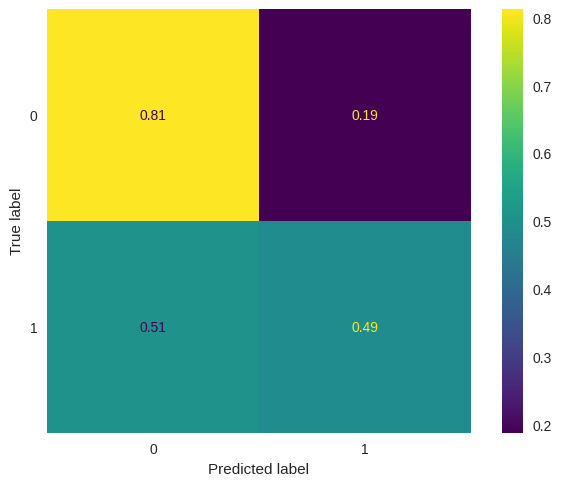

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.48677248677248675
Recall:  0.4919786096256685
F1_score:  0.48936170212765956


## Bonus (Optional)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lr_model = LogisticRegression( max_iter = 2000 )
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()


In [ ]:
# Logistic Regression
lr_model.fit(X_train, y_train)


# K-nearst Neighbors Classifier
knn_model.fit(X_train, y_train)

# Gaussian Naive Bayes
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Logistic Regression accuarcy

lr_model.score(X_test, y_test)

0.7924170616113744

In [ ]:
# K-nearst Neighbors Classifier accuarcy

knn_model.score(X_test, y_test)

0.7672985781990521

In [ ]:
# Gaussian Naive Bayes accuarcy

nb_model.score(X_test, y_test)

0.7170616113744076

As seen above, after comparing the peformance of the decision tree, logistic regression, KNN and Naive Bayes model. It can be deduced that the LR model outpeformed all the other classifiications algorithms by providing an astounding 79.2% accuracy.